In [29]:
import os
import cv2
import numpy as np

# Define the directory containing the dataset
data_dir = '/kaggle/input/brain-tumor/data'

# Define lists to store images and labels
images = []
labels = []

# Define the desired dimensions for resizing
desired_width = 224
desired_height = 224

# Loop through each subdirectory (0 and 1)
for label in os.listdir(data_dir):
    # Get the path to the subdirectory
    subdir = os.path.join(data_dir, label)
    
    # Loop through each image in the subdirectory
    for file_name in os.listdir(subdir):
        # Get the path to the image file
        img_path = os.path.join(subdir, file_name)
        
        # Read the image using OpenCV
        img = cv2.imread(img_path)
        
        # If the image is successfully read
        if img is not None:
            # Resize the image to the desired dimensions
            img = cv2.resize(img, (desired_width, desired_height))
            
            # Append the image to the list
            images.append(img)
            
            # Append the label to the list
            labels.append(int(label))  # Convert label to integer (0 or 1)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Print the shape of the images and labels arrays
print("Shape of images array:", images.shape)
print("Shape of labels array:", labels.shape)


Shape of images array: (3000, 224, 224, 3)
Shape of labels array: (3000,)


In [30]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Split the training data into training and validation sets (75% train, 25% validation)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

# Print the shapes of the resulting arrays
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_val:", x_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (1800, 224, 224, 3)
Shape of y_train: (1800,)
Shape of x_val: (600, 224, 224, 3)
Shape of y_val: (600,)
Shape of x_test: (600, 224, 224, 3)
Shape of y_test: (600,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Define input shape for the ResNet50 model
input_shape = (224, 224, 3)  # Assuming images are resized to 224x224

# Load the pre-trained ResNet50 model without including the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not updated during training
for layer in base_model.layers:
    layer.trainable = False

# Add a custom top (fully connected) layer for our specific task
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(128, activation='relu')(x)  # Dense layer with 128 units and ReLU activation
predictions = Dense(1, activation='sigmoid')(x)  # Output layer with 1 unit and sigmoid activation (binary classification)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define batch size and number of epochs
batch_size = 32
epochs = 10  # Adjust as needed

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
from tensorflow.keras.layers import Dropout

# Define input shape for the ResNet50 model
input_shape = (224, 224, 3)  # Assuming images are resized to 224x224

# Load the pre-trained ResNet50 model without including the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not updated during training
for layer in base_model.layers:
    layer.trainable = False

# Add a custom top (fully connected) layer for our specific task with dropout regularization
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(128, activation='relu')(x)  # Dense layer with 128 units and ReLU activation
x = Dropout(0.5)(x)  # Dropout regularization with a dropout rate of 0.5
predictions = Dense(1, activation='sigmoid')(x)  # Output layer with 1 unit and sigmoid activation (binary classification)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with Adam optimizer and binary cross-entropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define batch size and number of epochs
batch_size = 32
epochs = 20  # Adjust as needed

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss_plot.png')  # Save the loss plot as an image
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy_plot.png')  # Save the accuracy plot as an image
plt.show()


In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate predictions on test set
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred).astype(int)

# Define class labels
class_labels = ['non_tumor', 'tumor']

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.savefig('confusion_matrix.png')  # Save confusion matrix plot as an image
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Calculate predicted classes
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred).astype(int)

# Generate classification report
report = classification_report(y_test, y_pred_classes, target_names=class_labels)

# Print classification report
print("Classification Report:")
print(report)

# Save classification report to a text file
with open('classification_report.txt', 'w') as file:
    file.write("Classification Report:\n")
    file.write(report)

# Save classification report as a separate file
with open('classification_report_separate.txt', 'w') as file:
    file.write("Classification Report:\n")
    file.write(report)


In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate predicted probabilities for positive class
y_pred_proba = model.predict(x_test)

# Compute ROC curve and ROC area for positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png')  # Save ROC curve plot as an image
plt.show()


In [31]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Define input shape for the VGG16 model
input_shape = (224, 224, 3)  # Assuming images are resized to 224x224

# Load the pre-trained VGG16 model without including the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not updated during training
for layer in base_model.layers:
    layer.trainable = False

# Add a custom top (fully connected) layer for our specific task
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(128, activation='relu')(x)  # Dense layer with 128 units and ReLU activation
predictions = Dense(1, activation='sigmoid')(x)  # Output layer with 1 unit and sigmoid activation (binary classification)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,780,481 (56.38 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [32]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define batch size and number of epochs
batch_size = 32
epochs = 10

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


Epoch 1/10
 1/57 ━━━━━━━━━━━━━━━━━━━━ 33:25 36s/step - accuracy: 0.4688 - loss: 2.0569

W0000 00:00:1709662970.793420     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.7425 - loss: 0.8249

W0000 00:00:1709662988.613349     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1709662989.609005     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


57/57 ━━━━━━━━━━━━━━━━━━━━ 82s 823ms/step - accuracy: 0.7441 - loss: 0.8190 - val_accuracy: 0.9467 - val_loss: 0.1471
Epoch 2/10


W0000 00:00:1709663016.872723     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - accuracy: 0.9597 - loss: 0.1159 - val_accuracy: 0.9650 - val_loss: 0.1062
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - accuracy: 0.9690 - loss: 0.0811 - val_accuracy: 0.9700 - val_loss: 0.1077
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - accuracy: 0.9898 - loss: 0.0464 - val_accuracy: 0.9750 - val_loss: 0.0801
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - accuracy: 0.9977 - loss: 0.0204 - val_accuracy: 0.9750 - val_loss: 0.0799
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - accuracy: 0.9994 - loss: 0.0199 - val_accuracy: 0.9783 - val_loss: 0.0734
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - accuracy: 0.9967 - loss: 0.0177 - val_accuracy: 0.9833 - val_loss: 0.0756
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - accuracy: 1.0000 - loss: 0.0086 - val_accuracy: 0.9800 - val_loss: 0.0577
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - accuracy: 1.0000 - loss: 0.0064 - val_accuracy: 0.983

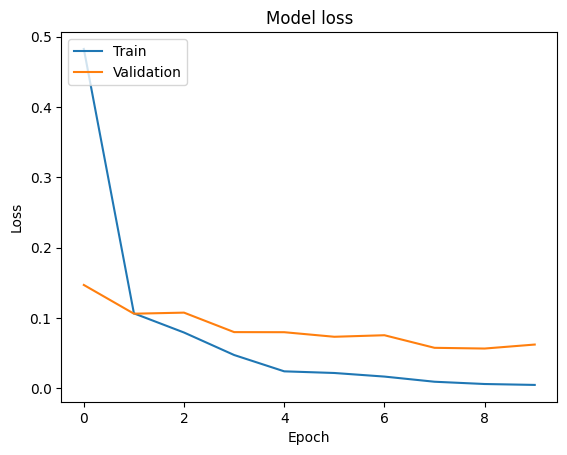

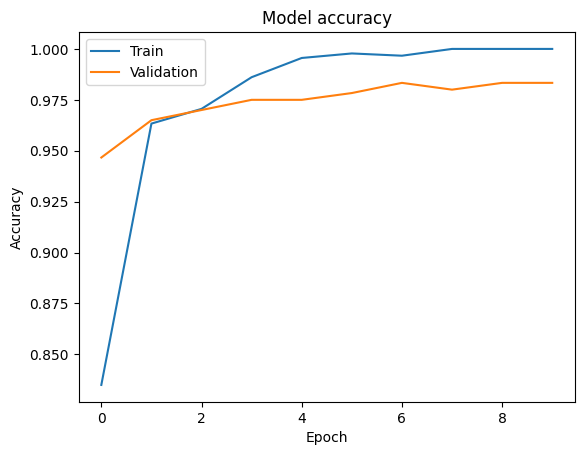

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss_plot1.png')  # Save the loss plot as an image
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy_plot1.png')  # Save the accuracy plot as an image
plt.show()


 2/19 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step 

W0000 00:00:1709663138.449144     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step


W0000 00:00:1709663141.256582     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


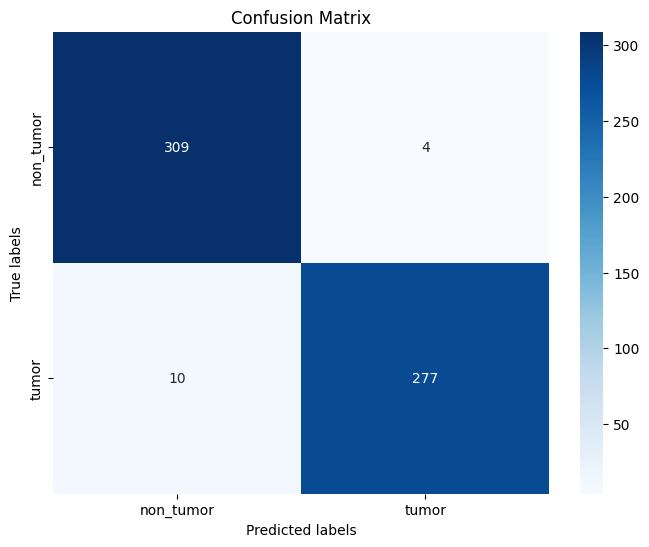

In [34]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate predictions on test set
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred).astype(int)

# Define class labels
class_labels = ['non_tumor', 'tumor']

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.savefig('confusion_matrix1.png')  # Save confusion matrix plot as an image
plt.show()


In [35]:
from sklearn.metrics import classification_report

# Calculate predicted classes
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred).astype(int)

# Generate classification report
report = classification_report(y_test, y_pred_classes, target_names=class_labels)

# Print classification report
print("Classification Report:")
print(report)

# Save classification report to a text file
with open('classification_report.txt', 'w') as file:
    file.write("Classification Report:\n")
    file.write(report)

# Save classification report as a separate file
with open('classification_report_separate1.txt', 'w') as file:
    file.write("Classification Report:\n")
    file.write(report)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step
Classification Report:
              precision    recall  f1-score   support

   non_tumor       0.97      0.99      0.98       313
       tumor       0.99      0.97      0.98       287

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step


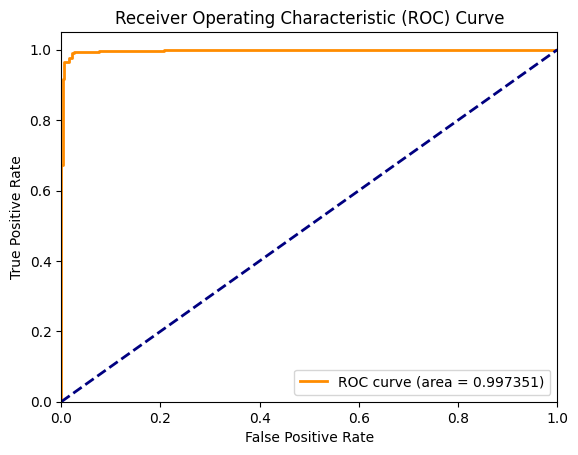

In [36]:
from sklearn.metrics import roc_auc_score

# Calculate predicted probabilities for positive class
y_pred_proba = model.predict(x_test)

# Compute ROC curve and ROC area for positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('roc_curve1.png')  # Save ROC curve plot as an image
plt.show()
